# **Analysis of the data set**

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from scipy.stats import f, ttest_ind
from scipy.stats import chi2_contingency


# A look at the data

In [57]:
data = pd.read_csv('Global YouTube Statistics.csv', encoding='ISO-8859-1')
pd.set_option('display.max_columns', None)
data.head()


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


#**Part I – Descriptive statistics:**

Our 3 Chosen features are:

 1.created_year

 2.population

 3.uploads


#**created_year**

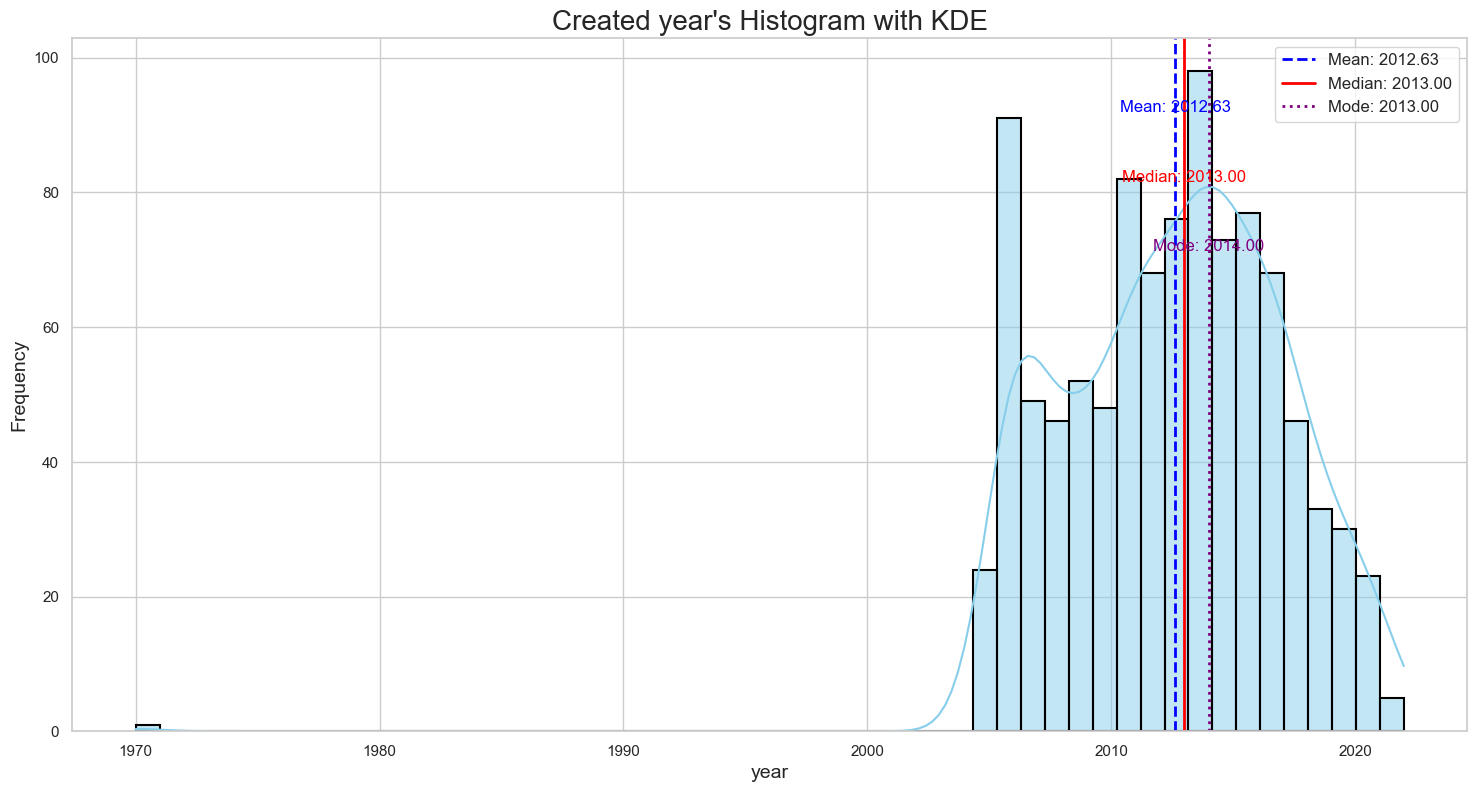

In [58]:
#histogram with KDE-plot

plt.figure(figsize=(18, 9))
sns.set(style="whitegrid")

# Histogram with KDE
hist_plot = sns.histplot(data["created_year"], bins=53, kde=True, color="skyblue", edgecolor="black", linewidth=1.5)

# Customize the plot
hist_plot.set_title("Created year's Histogram with KDE", fontsize=20)
hist_plot.set_xlabel('year', fontsize=14)
hist_plot.set_ylabel('Frequency', fontsize=14)

# Add vertical lines for the mean and median

mean_created_year = data["created_year"].mean()
median_created_year = data["created_year"].median()
mode_created_year = data["created_year"].mode()[0]

plt.axvline(mean_created_year, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_created_year:.2f}')
plt.axvline(median_created_year, color='red', linestyle='-', linewidth=2, label=f'Median: {median_created_year:.2f}')
plt.axvline(mode_created_year, color='purple', linestyle=':', linewidth=2, label=f'Mode: {median_created_year:.2f}')

# Add a legend
plt.legend(fontsize=12)

# Add annotations for mean and median
plt.text(mean_created_year, plt.ylim()[1]*0.9, f'Mean: {mean_created_year:.2f}', color='blue', ha='center', va='center', fontsize=12)
plt.text(median_created_year, plt.ylim()[1]*0.8, f'Median: {median_created_year:.2f}', color='red', ha='center', va='center', fontsize=12)
plt.text(mode_created_year, plt.ylim()[1]*0.7, f'Mode: {mode_created_year:.2f}', color='purple', ha='center', va='center', fontsize=12)
plt.show()

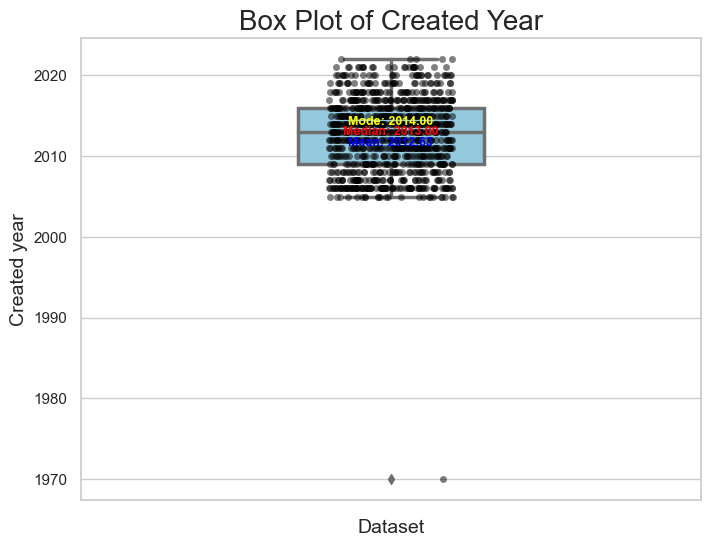

In [59]:
# Create a DataFrame
df = pd.DataFrame({'Value': data["created_year"]})

# Create the plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create the box plot
box_plot = sns.boxplot(y='Value', data=df, width=0.3, palette=["skyblue"], linewidth=2.5)

# Customize the plot
box_plot.set_title('Box Plot of Created Year', fontsize=20)
box_plot.set_xlabel('Dataset', fontsize=14)
box_plot.set_ylabel('Created year', fontsize=14)

# Add data points
sns.stripplot(y='Value', data=df, color='black', alpha=0.5, jitter=True)

# Add annotations


plt.text(0, mean_created_year - 1.0, f'Mean: {mean_created_year:.2f}', color='blue', ha='center', va='center', fontsize=9, weight='bold')
plt.text(0, median_created_year, f'Median: {median_created_year:.2f}', color='red', ha='center', va='center', fontsize=9, weight='bold')
plt.text(0,mode_created_year + 0.3, f'Mode: {mode_created_year:.2f}', color='yellow', ha='center', va='center', fontsize=9, weight='bold')
plt.show()

As observed in the graph, one of the top 1000 YouTube channels is recorded as being created in 1970. Since YouTube was only established in 2005, this date is clearly incorrect and is considered an outlier. Consequently, we decided to remove this channel from the dataset to ensure accuracy and reliability in our analysis

In [60]:
oldest_channels = data.nsmallest(5, 'created_year')
print(oldest_channels[['Youtuber', 'created_year']])

        Youtuber  created_year
101      YouTube        1970.0
21        Zee TV        2005.0
51     Bad Bunny        2005.0
57   BRIGHT SIDE        2005.0
63       Shakira        2005.0


checking for outliers - we see that for somereason the "Youtube" channels seems to be opened at 1970, but Youtube started only in 2005.

In [61]:
newest_channels = data.nlargest(10, 'created_year')
print(newest_channels[['Youtuber', 'created_year']])

                                   Youtuber  created_year
548                            Salman Noman        2022.0
852                                Vibhu 96        2022.0
886                             Ryan Trahan        2022.0
957  Bebefinn - Nursery Rhymes & Kids Songs        2022.0
969                         Quantum Tech HD        2022.0
77                LUCCAS NETO - LUCCAS TOON        2021.0
178                            Shorts Break        2021.0
254                     MrBeast en Espaï¿½ï        2021.0
310                          LeoNata Family        2021.0
320                       Sagawa /ï¿½ï¿½ï¿½        2021.0


checking for outliers we see that there is not outlier here

##**detect and drop the outlier**

In [62]:
# Get the index of the row where 'created_year' is 1970
outlier_index = data[data['created_year'] == 1970].index

# Drop the row by its index
data = data.drop(outlier_index)


##**created_year without outlier**

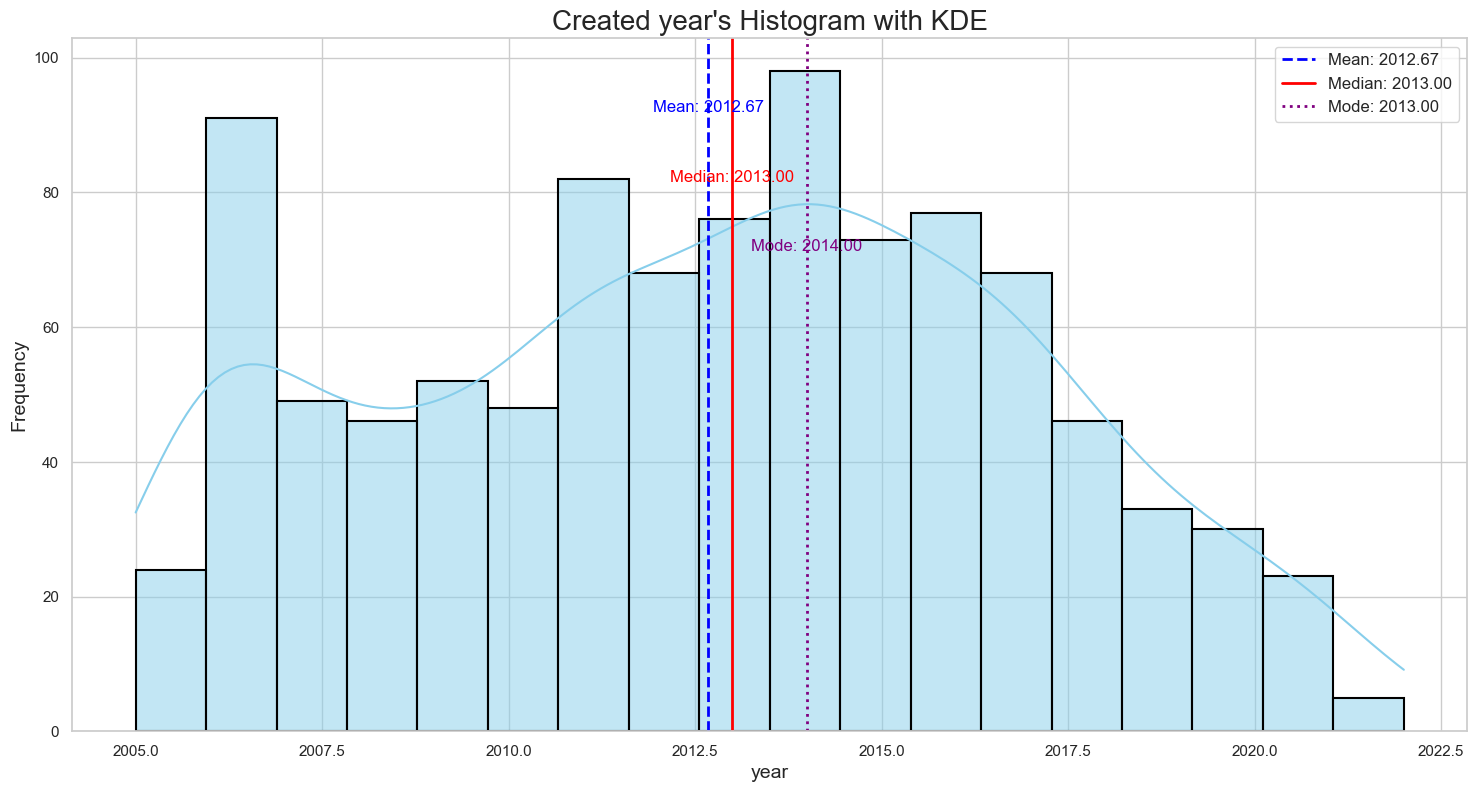

In [63]:
#histogram with KDE-plot

plt.figure(figsize=(18, 9))
sns.set(style="whitegrid")

# Histogram with KDE
hist_plot = sns.histplot(data["created_year"], bins=18, kde=True, color="skyblue", edgecolor="black", linewidth=1.5)

# Customize the plot
hist_plot.set_title("Created year's Histogram with KDE", fontsize=20)
hist_plot.set_xlabel('year', fontsize=14)
hist_plot.set_ylabel('Frequency', fontsize=14)

# Add vertical lines for the mean and median

mean_created_year = data["created_year"].mean()
median_created_year = data["created_year"].median()
mode_created_year = data["created_year"].mode()[0]

plt.axvline(mean_created_year, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_created_year:.2f}')
plt.axvline(median_created_year, color='red', linestyle='-', linewidth=2, label=f'Median: {median_created_year:.2f}')
plt.axvline(mode_created_year, color='purple', linestyle=':', linewidth=2, label=f'Mode: {median_created_year:.2f}')

# Add a legend
plt.legend(fontsize=12)

# Add annotations for mean and median
plt.text(mean_created_year, plt.ylim()[1]*0.9, f'Mean: {mean_created_year:.2f}', color='blue', ha='center', va='center', fontsize=12)
plt.text(median_created_year, plt.ylim()[1]*0.8, f'Median: {median_created_year:.2f}', color='red', ha='center', va='center', fontsize=12)
plt.text(mode_created_year, plt.ylim()[1]*0.7, f'Mode: {mode_created_year:.2f}', color='purple', ha='center', va='center', fontsize=12)
plt.show()

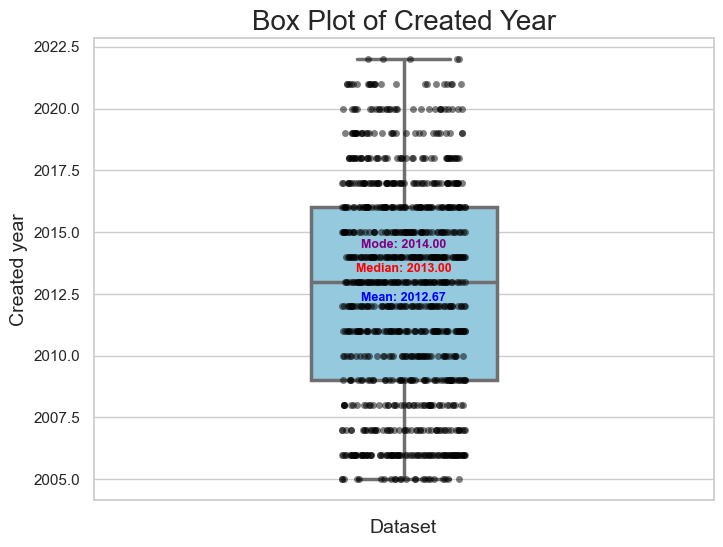

In [64]:
# Create a DataFrame
df = pd.DataFrame({'Value': data["created_year"]})

# Create the plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create the box plot
box_plot = sns.boxplot(y='Value', data=df, width=0.3, palette=["skyblue"], linewidth=2.5)

# Customize the plot
box_plot.set_title('Box Plot of Created Year', fontsize=20)
box_plot.set_xlabel('Dataset', fontsize=14)
box_plot.set_ylabel('Created year', fontsize=14)

# Add data points
sns.stripplot(y='Value', data=df, color='black', alpha=0.5, jitter=True)

# Add annotations


plt.text(0, mean_created_year -0.35, f'Mean: {mean_created_year:.2f}', color='blue', ha='center', va='center', fontsize=9, weight='bold')
plt.text(0, median_created_year +0.5, f'Median: {median_created_year:.2f}', color='red', ha='center', va='center', fontsize=9, weight='bold')
plt.text(0,mode_created_year +0.5, f'Mode: {mode_created_year:.2f}', color='purple', ha='center', va='center', fontsize=9, weight='bold')
plt.show()

#**Measures the center of the distribution**

In [65]:
print("the created year's mean is:", mean_created_year)

print("the created year'ss median is:", median_created_year)

created_year_var = data['created_year'].var()
print("the created year's variance is:", created_year_var)

print("the created year's mode is:", mode_created_year)

squared_diffs = (data['created_year'] - mean_created_year) ** 2
created_year_mse = squared_diffs.mean()
print("MSE:", created_year_mse)

the created year's mean is: 2012.6734074823053
the created year'ss median is: 2013.0
the created year's variance is: 18.542014794315946
the created year's mode is: 2014.0
MSE: 18.52326654882167


##**Population**

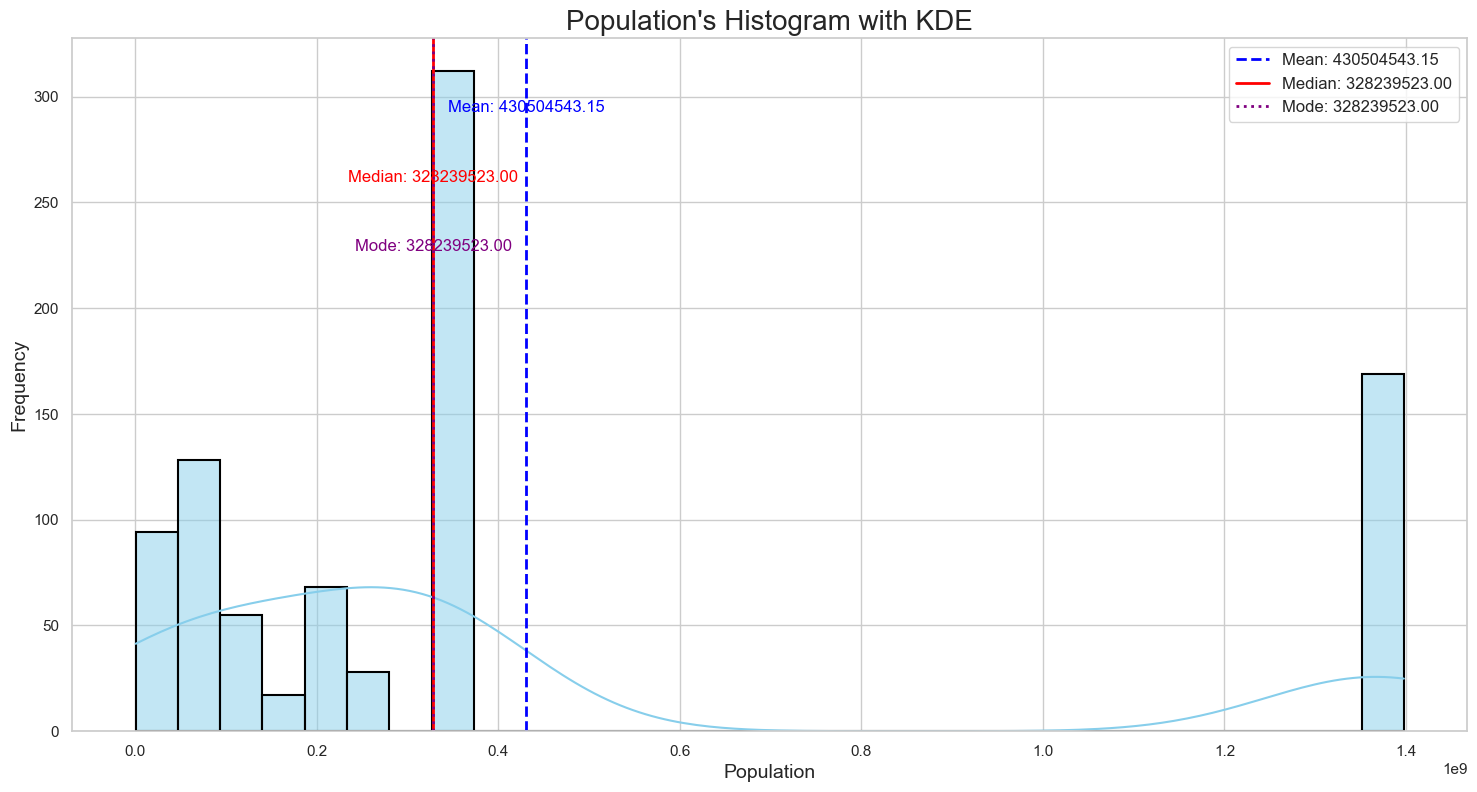

In [66]:
# Create the figure with specified size
plt.figure(figsize=(18, 9))

# Create the histogram with KDE
hist_plot = sns.histplot(data['Population'], bins=30, kde=True, color="skyblue", edgecolor="black", linewidth=1.5)

# Customize the plot
hist_plot.set_title("Population's Histogram with KDE", fontsize=20)
hist_plot.set_xlabel('Population', fontsize=14)
hist_plot.set_ylabel('Frequency', fontsize=14)

# Calculate mean, median, and mode
mean_Population = data['Population'].mean()
median_Population = data['Population'].median()
mode_Population = data['Population'].mode()[0]

# Add vertical lines for the mean, median, and mode
plt.axvline(mean_Population, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_Population:.2f}')
plt.axvline(median_Population, color='red', linestyle='-', linewidth=2, label=f'Median: {median_Population:.2f}')
plt.axvline(mode_Population, color='purple', linestyle=':', linewidth=2, label=f'Mode: {mode_Population:.2f}')

# Add a legend
plt.legend(fontsize=12)

# Add annotations for mean, median, and mode
plt.text(mean_Population, plt.ylim()[1]*0.9, f'Mean: {mean_Population:.2f}', color='blue', ha='center', va='center', fontsize=12)
plt.text(median_Population, plt.ylim()[1]*0.8, f'Median: {median_Population:.2f}', color='red', ha='center', va='center', fontsize=12)
plt.text(mode_Population, plt.ylim()[1]*0.7, f'Mode: {mode_Population:.2f}', color='purple', ha='center', va='center', fontsize=12)

# Display the plot
plt.show()

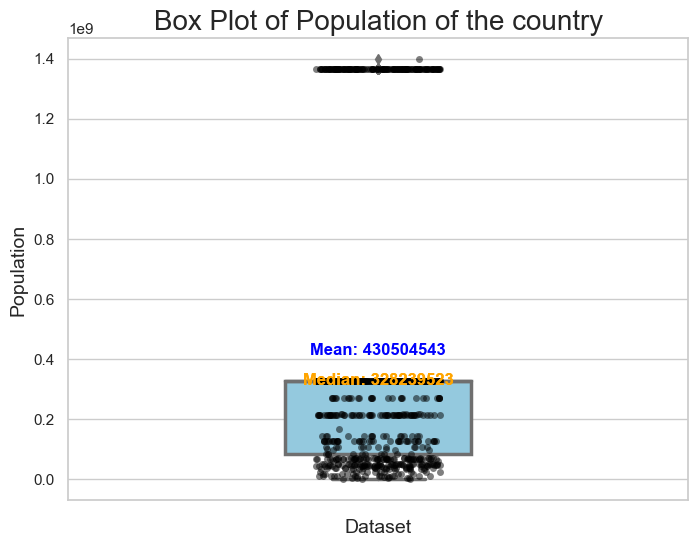

In [67]:
# Create a DataFrame
df = pd.DataFrame({'Value': data["Population"]})

# Create the plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create the box plot
box_plot = sns.boxplot(y='Value', data=df, width=0.3, palette=["skyblue"], linewidth=2.5)

# Customize the plot
box_plot.set_title('Box Plot of Population of the country', fontsize=20)
box_plot.set_xlabel('Dataset', fontsize=14)
box_plot.set_ylabel('Population', fontsize=14)

# Add data points
sns.stripplot(y='Value', data=df, color='black', alpha=0.5, jitter=True)

# Add annotations

plt.text(0, mean_Population, f'Mean: {mean_Population:.0f}', color='blue', ha='center', va='center', fontsize=12, weight='bold')
plt.text(0, median_Population , f'Median: {median_Population:.0f}', color='orange', ha='center', va='center', fontsize=12, weight='bold')
plt.text(0, mode_Population , f'Median: {mode_Population:.0f}', color='orange', ha='center', va='center', fontsize=12, weight='bold')
plt.show()

In [68]:
max_country_population = data.groupby('Country', as_index=False)['Population'].max()
top_countries = max_country_population.nlargest(10, 'Population')
print("The top 10 populated countries in our dataset:")
display(top_countries.style.hide(axis="index"))

The top 10 populated countries in our dataset:


Country,Population
China,1397715000.000000
India,1366417754.000000
United States,328239523.000000
Indonesia,270203917.000000
Pakistan,216565318.000000
Brazil,212559417.000000
Bangladesh,167310838.000000
Russia,144373535.000000
Japan,126226568.000000
Mexico,126014024.000000


checking for outliers by comparing the numbers we got with wikipedia and wee see the data regarding to 2023 is relyable. for some of the largest countries there is no exact number of population, only an estiamtion, these number are very similar to few estimations we saw. china in particular.

In [69]:
min_country_population = data.groupby('Country', as_index=False)['Population'].min()
min_countries = min_country_population.nsmallest(10, 'Population')
print("The 10 least populated countries in our database:")
# Display the DataFrame without the index column
display(min_countries.style.hide(axis="index"))


The 10 least populated countries in our database:


Country,Population
Samoa,202506.000000
Barbados,287025.000000
Latvia,1912789.000000
Kuwait,4207083.000000
Finland,5520314.000000
Singapore,5703569.000000
El Salvador,6453553.000000
Switzerland,8574832.000000
United Arab Emirates,9770529.000000
Jordan,10101694.000000


checking for outliers see that everything is ok. some other small countries dont appear here ofcourse beacuse its regarding only the 1000 most successful channels. for example in Israel there is no successful channel(enough to be in top 1000)

#**Measures the center of the distribution**

In [70]:
print("the population's mean is:", mean_Population)

print("the population's median is:", median_Population)

population_var = data['Population'].var()
print("the population's variance is:", population_var)

print("the population's mode is:", mode_Population)

squared_diffs = (data['Population'] - mean_Population) ** 2
population_mse = squared_diffs.mean()
print("MSE:", population_mse)

the population's mean is: 430504543.15154994
the population's median is: 328239523.0
the population's variance is: 2.237797791403408e+17
the population's mode is: 328239523.0
MSE: 2.235228563169873e+17


Your text is mostly clear, but here’s a slightly polished version with corrected grammar and spelling:

Despite the large gap between approximately 330 million people and approximately 1.4 billion people, there is no anomaly. India, the most populous country in the world, where a significant portion of the YouTube channels in the dataset we are analyzing originates, has a population of about 1.4 billion people. The next most populous country is China, but it is not included in this dataset because all Google platforms, including YouTube, are blocked in China. For example, the Chinese equivalent to YouTube is Youku. On YouTube, there is only one Chinese channel, which we assume is approved by the Chinese government.

##**uploads**

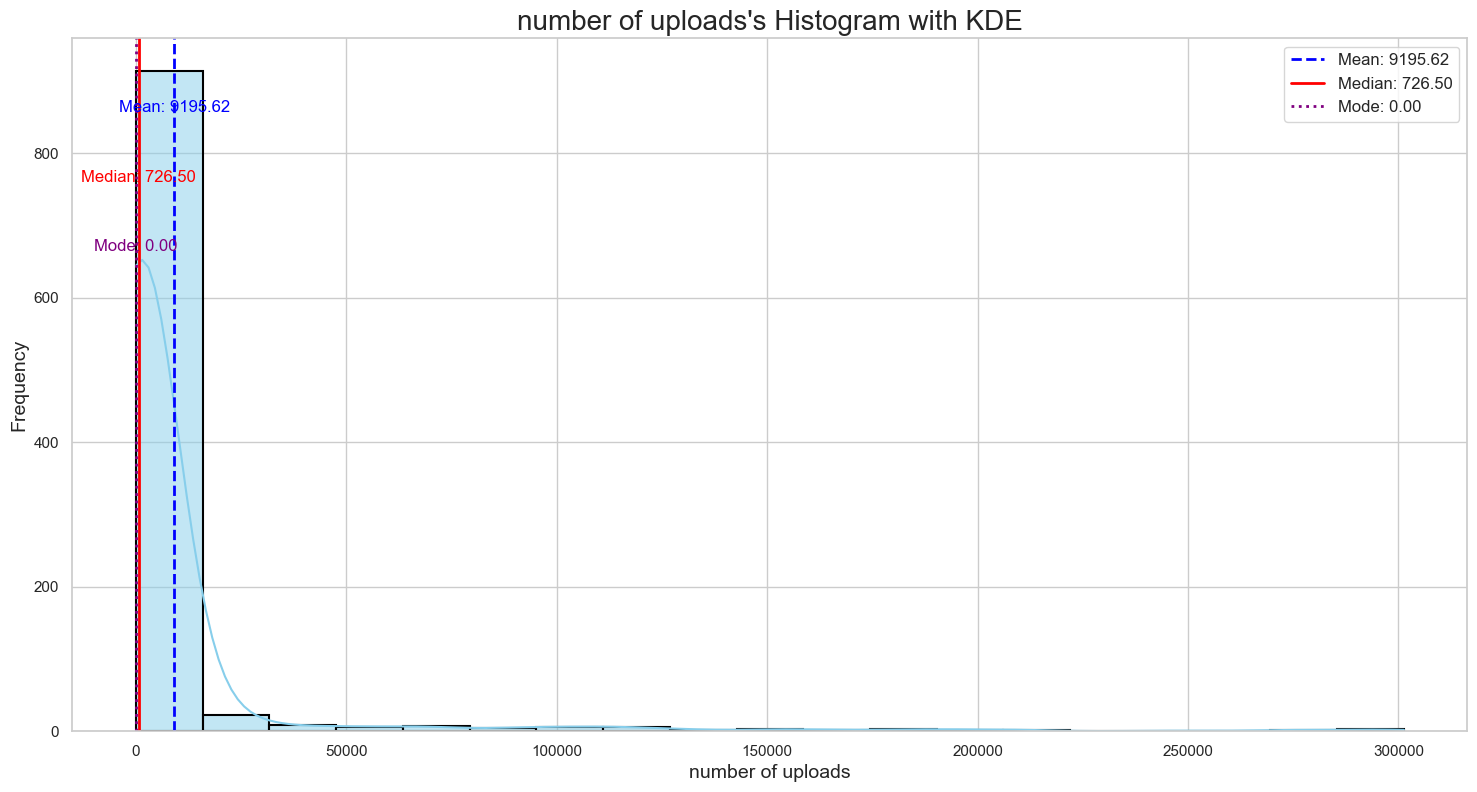

In [71]:
# Create the figure with specified size
plt.figure(figsize=(18, 9))

# Create the histogram with KDE
hist_plot = sns.histplot(data['uploads'], bins=19, kde=True, color="skyblue", edgecolor="black", linewidth=1.5)

# Customize the plot
hist_plot.set_title("number of uploads's Histogram with KDE", fontsize=20)
hist_plot.set_xlabel('number of uploads', fontsize=14)
hist_plot.set_ylabel('Frequency', fontsize=14)

# Calculate mean, median, and mode
mean_uploads = data['uploads'].mean()
median_uploads = data['uploads'].median()
mode_uploads = data['uploads'].mode()[0]

# Add vertical lines for the mean, median, and mode
plt.axvline(mean_uploads, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_uploads:.2f}')
plt.axvline(median_uploads, color='red', linestyle='-', linewidth=2, label=f'Median: {median_uploads:.2f}')
plt.axvline(mode_uploads, color='purple', linestyle=':', linewidth=2, label=f'Mode: {mode_uploads:.2f}')

# Add a legend
plt.legend(fontsize=12)

# Add annotations for mean, median, and mode
plt.text(mean_uploads, plt.ylim()[1]*0.9, f'Mean: {mean_uploads:.2f}', color='blue', ha='center', va='center', fontsize=12)
plt.text(median_uploads, plt.ylim()[1]*0.8, f'Median: {median_uploads:.2f}', color='red', ha='center', va='center', fontsize=12)
plt.text(mode_uploads, plt.ylim()[1]*0.7, f'Mode: {mode_uploads:.2f}', color='purple', ha='center', va='center', fontsize=12)

# Display the plot
plt.show()

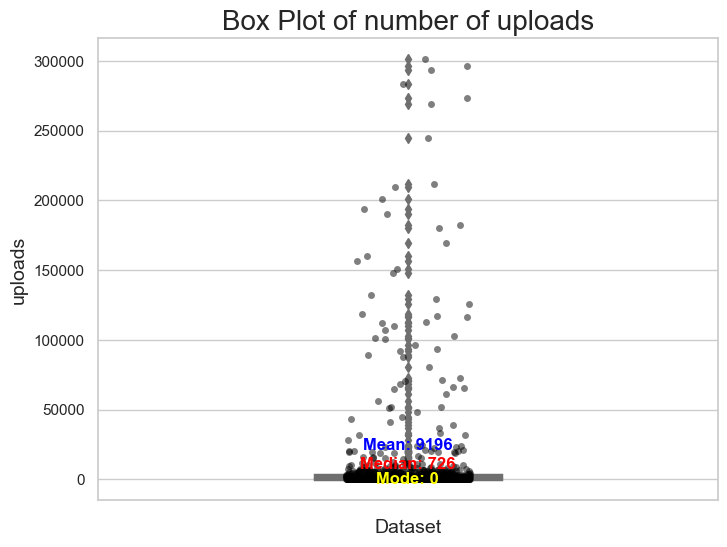

In [72]:
# Create a DataFrame
df = pd.DataFrame({'Value': data["uploads"]})

# Create the plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")# Create a DataFrame
df = pd.DataFrame({'Value': data["uploads"]})

# Create the box plot
box_plot = sns.boxplot(y='Value', data=df, width=0.3, palette=["skyblue"], linewidth=2.5)

# Customize the plot
box_plot.set_title('Box Plot of number of uploads', fontsize=20)
box_plot.set_xlabel('Dataset', fontsize=14)
box_plot.set_ylabel('uploads', fontsize=14)

# Add data points
sns.stripplot(y='Value', data=df, color='black', alpha=0.5, jitter=True)

# Add annotations

plt.text(0, mean_uploads +15000, f'Mean: {mean_uploads:.0f}', color='blue', ha='center', va='center', fontsize=12, weight='bold')
plt.text(0, median_uploads +10000, f'Median: {median_uploads:.0f}', color='red', ha='center', va='center', fontsize=12, weight='bold')
plt.text(0, mode_uploads , f'Mode: {mode_uploads:.0f}', color='yellow', ha='center', va='center', fontsize=12, weight='bold')
plt.show()



In [73]:
min_uploads = data.nsmallest(50, 'uploads')
print("The 50 channels with the smallest number of videos uploaded:")
display(min_uploads[['Youtuber', 'uploads']])

The 50 channels with the smallest number of videos uploaded:


,Youtuber,uploads
5,Music,0
12,Gaming,0
57,BRIGHT SIDE,0
73,Luisito Comunica,0
102,News,0
113,T-Series Apna Punjab,0
149,Luis Fonsi,0
166,Frost Diamond,0
180,Aditya Music India,0
190,Sandeep Maheshwari,0


checking for outliers we see that are many outliers here, its easy to see that its not reasonable that a successful youtube channel will have zero uploads. we checked some of those youtube channels and it appears that there was a problem, probably in the API work, because the channels we checked had a lot of uploads and certainly not zero.And so we decided to drop them from the sample

In [74]:
max_uploads = data.nlargest(10, 'uploads')
display(max_uploads[['Youtuber', 'uploads']])

,Youtuber,uploads
95,ABP NEWS,301308
857,GMA Integrated News,296272
747,TV9 Bharatvarsh,293516
33,Aaj Tak,283775
107,IndiaTV,273255
689,KOMPASTV,269050
586,Thairath Online,244899
502,News 24,211620
673,ABS-CBN News,209520
84,TEDx Talks,200933


checking for outliers we see that some of the channels have a huge amount of uploads which seemed unreasonable at first, but by looking into these channels and their uploading pace (few per day) it not an outlier.

#detect and drop the outlier

In [75]:
# Get the index of the row where 'upload' number is 0
outlier_index = data[data['uploads'] == 0].index

# Drop the row by its index
data = data.drop(outlier_index)

## Uploads without out-liers

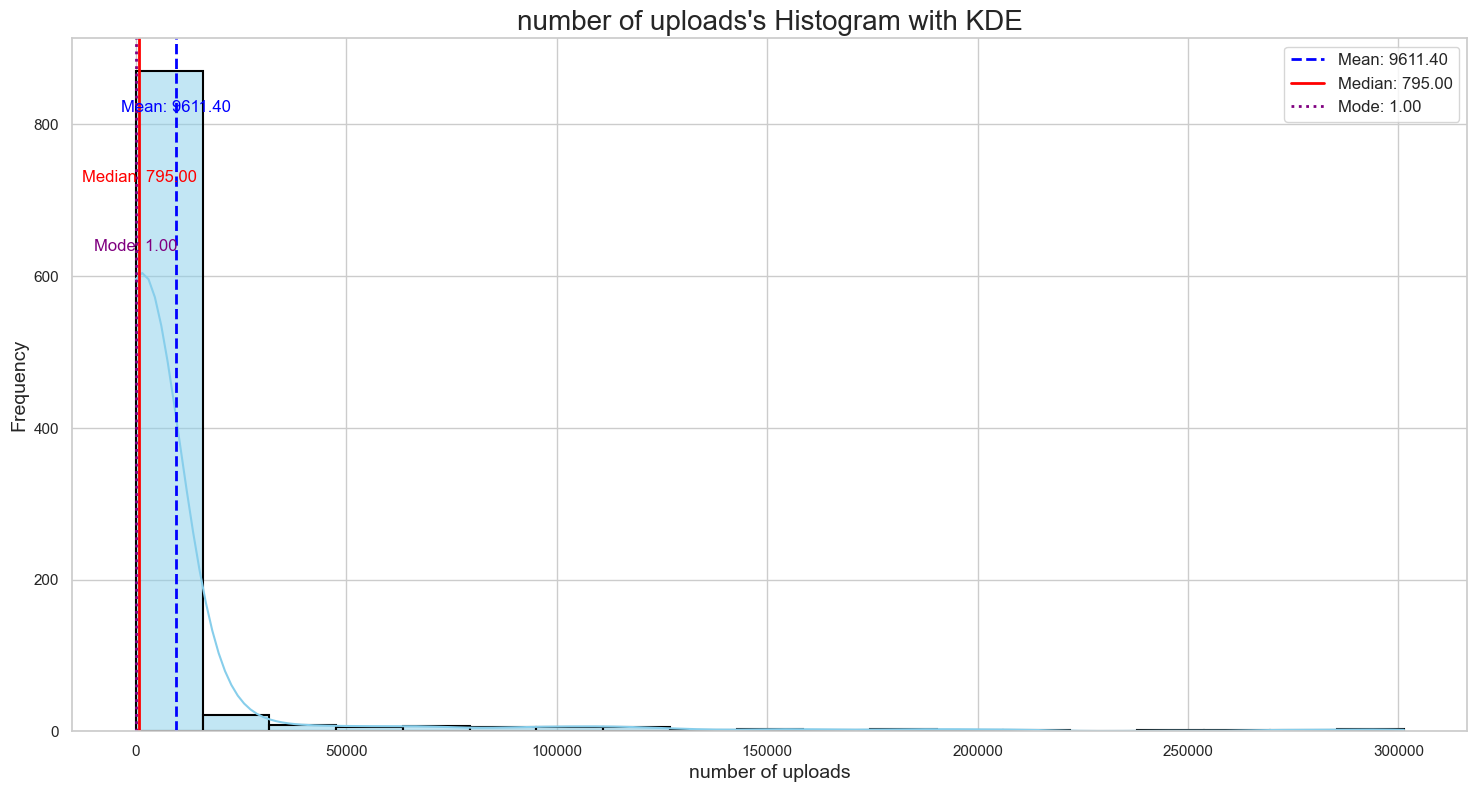

In [76]:
# Create the figure with specified size
plt.figure(figsize=(18, 9))

# Create the histogram with KDE
hist_plot = sns.histplot(data['uploads'], bins=19, kde=True, color="skyblue", edgecolor="black", linewidth=1.5)

# Customize the plot
hist_plot.set_title("number of uploads's Histogram with KDE", fontsize=20)
hist_plot.set_xlabel('number of uploads', fontsize=14)
hist_plot.set_ylabel('Frequency', fontsize=14)

# Calculate mean, median, and mode
mean_uploads = data['uploads'].mean()
median_uploads = data['uploads'].median()
mode_uploads = data['uploads'].mode()[0]

# Add vertical lines for the mean, median, and mode
plt.axvline(mean_uploads, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_uploads:.2f}')
plt.axvline(median_uploads, color='red', linestyle='-', linewidth=2, label=f'Median: {median_uploads:.2f}')
plt.axvline(mode_uploads, color='purple', linestyle=':', linewidth=2, label=f'Mode: {mode_uploads:.2f}')

# Add a legend
plt.legend(fontsize=12)

# Add annotations for mean, median, and mode
plt.text(mean_uploads, plt.ylim()[1]*0.9, f'Mean: {mean_uploads:.2f}', color='blue', ha='center', va='center', fontsize=12)
plt.text(median_uploads, plt.ylim()[1]*0.8, f'Median: {median_uploads:.2f}', color='red', ha='center', va='center', fontsize=12)
plt.text(mode_uploads, plt.ylim()[1]*0.7, f'Mode: {mode_uploads:.2f}', color='purple', ha='center', va='center', fontsize=12)

# Display the plot
plt.show()

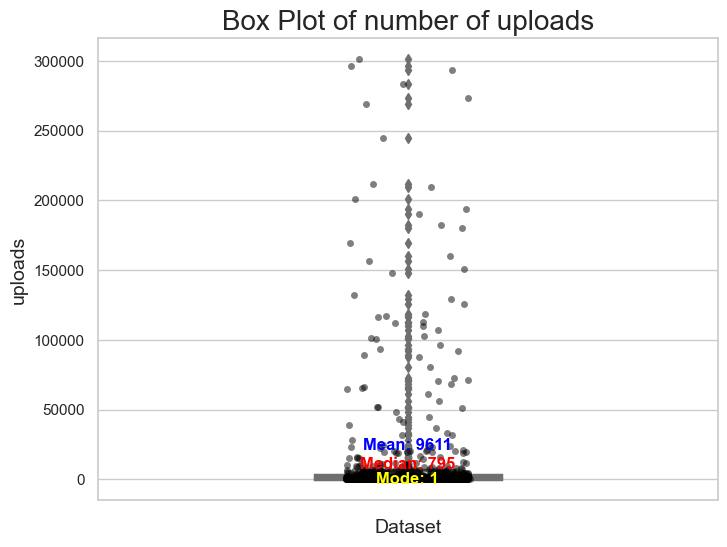

In [77]:
# Create a DataFrame
df = pd.DataFrame({'Value': data["uploads"]})

# Create the plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")# Create a DataFrame
df = pd.DataFrame({'Value': data["uploads"]})

# Create the box plot
box_plot = sns.boxplot(y='Value', data=df, width=0.3, palette=["skyblue"], linewidth=2.5)

# Customize the plot
box_plot.set_title('Box Plot of number of uploads', fontsize=20)
box_plot.set_xlabel('Dataset', fontsize=14)
box_plot.set_ylabel('uploads', fontsize=14)

# Add data points
sns.stripplot(y='Value', data=df, color='black', alpha=0.5, jitter=True)

# Add annotations

plt.text(0, mean_uploads +15000, f'Mean: {mean_uploads:.0f}', color='blue', ha='center', va='center', fontsize=12, weight='bold')
plt.text(0, median_uploads +10000, f'Median: {median_uploads:.0f}', color='red', ha='center', va='center', fontsize=12, weight='bold')
plt.text(0, mode_uploads , f'Mode: {mode_uploads:.0f}', color='yellow', ha='center', va='center', fontsize=12, weight='bold')
plt.show()



#**Measures the center of the distribution**

In [78]:
print("the uploads's mean is:", mean_uploads)

print("the uploads's median is:", median_uploads)

uploads_var = data['uploads'].var()
print("the upload's variance is:", uploads_var)

print("the uploads's mode is:", mode_uploads)

squared_diffs = (data['uploads'] - mean_uploads) ** 2
uploads_mse = squared_diffs.mean()
print("MSE:", uploads_mse)

the uploads's mean is: 9611.40483701367
the uploads's median is: 795.0
the upload's variance is: 1216258054.8222494
the uploads's mode is: 1
MSE: 1214979129.4228578


Although the most common is 1, but in this case we chose not to delete it from the data because according to the test we did, there are channels with a high number of followers or views because they do live shows and do not upload videos

#**Part II – Statistical inference:**

## **Question 1**
Hypothesis tests on the mean

In [79]:
# 1. Hypothesis Tests on Means
# Left-tailed test on uploads
# Null hypothesis (H0): μ = 500
# Alternative hypothesis (H1): μ < 500

# Define the significance level
alpha = 0.05

#  standard deviation
std_uploads = data['uploads'].std()
n_uploads = len(data['uploads'])
# Perform the left-tailed t-test
t_statistic_left, p_value_left = stats.ttest_1samp(data['uploads'], 500, alternative='less')

# Right-tailed test on Population
# Null hypothesis (H0): μ = 4e8 (400 million)
# Alternative hypothesis (H1): μ > 4e8

std_population = data['Population'].std()
n_population = len(data['Population'])

# Perform the right-tailed t-test
t_statistic_right, p_value_right = stats.ttest_1samp(data['Population'].dropna(), 4e8, alternative='greater')

# Two-tailed test on created_year
# Null hypothesis (H0): μ = 2012
# Alternative hypothesis (H1): μ ≠ 2012

std_created_year = data['created_year'].std()
n_created_year = len(data['created_year'])

# Perform the two-tailed t-test
t_statistic_two, p_value_two = stats.ttest_1samp(data['created_year'].dropna(), 2012)

print(f't_statistic_left={t_statistic_left}, p_value_left={p_value_left}')
if p_value_left < alpha:
    print ('Reject the null hypothesis')
else:
    print ('Fail to reject the null hypothesis')
print(f't_statistic_right={t_statistic_right}, p_value_right={ p_value_right}')
if p_value_right < alpha:
    print ('Reject the null hypothesis')
else:
    print ('Fail to reject the null hypothesis')
print(f't_statistic_two={t_statistic_two}, p_value_two={p_value_two}')
if p_value_two < alpha:
    print ('Reject the null hypothesis')
else:
    print ('Fail to reject the null hypothesis')

t_statistic_left=8.056802863903044, p_value_left=0.9999999999999989
Fail to reject the null hypothesis
t_statistic_right=2.1184797116740675, p_value_right=0.017211505972119383
Reject the null hypothesis
t_statistic_two=5.226262237852005, p_value_two=2.1266912981332395e-07
Reject the null hypothesis


We decided to remove the missing values as they can bias the mean, consequently affecting the statistical significance. Additionally, the t-test is based on the assumption that the data is normally distributed. Missing values can violate this assumption and impact the validity of the test.

conclusion: Since the p-value is significantly higher than 0.05, we fail to reject the null hypothesis. There is no evidence to suggest that the mean number of uploads is less than 500.

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis. There is evidence to suggest that the mean population is greater than 400 million.

Conclusion: Since the p-value is significantly less than 0.05, we reject the null hypothesis. There is strong evidence to suggest that the mean created year is not 2012.

## **Question 2**
Hypothesis test on variance

In [80]:
# Take a random sample from uploads

sample_uploads = np.random.RandomState(seed=0).choice(data['uploads'].dropna(), size=31, replace=False)

# Define the significance level
alpha = 0.05

# Sample size
n = len(sample_uploads)

# Sample variance
sample_variance = np.var(sample_uploads, ddof=1)

# Hypothesized uploads variance
h0_variance = 1e9

# Chi-squared test statistic
chi2_statistic = (n - 1) * sample_variance / h0_variance

# Degrees of freedom
df = n - 1

# p-value for two-tailed test
p_value = 2 * min(stats.chi2.cdf(chi2_statistic, df),1- stats.chi2.cdf(chi2_statistic, df))

print(f"Chi-square statistic: {chi2_statistic}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print ('Reject the null hypothesis')
else:
    print ('Fail to reject the null hypothesis')

Chi-square statistic: 77.30248594270967
p-value: 9.57951348556918e-06
Reject the null hypothesis


We rejected the null hypothesis because the p-value is significantly smaller than the alpha level (0.05).

This means that there is strong evidence to suggest that the sample variance of uploads is significantly different from the hypothesized variance of 1 billion. In other words, the observed variability in the sample is unlikely to have occurred by chance if the true population variance were indeed 1 billion

## **Question 3**
Hypothesis test on proportion

In [81]:
# Discretize the created_year variable
data['created_year_binary'] = (data['created_year'] >= mean_created_year).astype(int)

# Calculate the sample proportion
sample_proportion = data['created_year_binary'].mean()

# Define the significance level and hypothesized proportion
alpha = 0.05
p0 = 0.5

# Sample size
n = len(data['created_year_binary'])

if n*p0 and n*(1-p0)<10:
    print("sample size is too small")
# Calculate the z-test statistic
z_statistic = (sample_proportion - p0) / np.sqrt((p0 * (1 - p0)) / n)


# Output the results
print(f'the z_statistic is :{z_statistic}')

if z_statistic>stats.norm.ppf(1-alpha) or z_statistic<-stats.norm.ppf(1-alpha):
    print ('Reject the null hypothesis')
else:
    print ('Fail to reject the null hypothesis')


the z_statistic is :2.302332744695601
Reject the null hypothesis


We rejected the null hypothesis.

This means that there is strong evidence to suggest that the proportion of created_year values greater than or equal to the mean is significantly different from 0.5. In other words, the data provides sufficient evidence to conclude that the created_year variable is not evenly distributed around its mean.

To summarize: The z-test indicates that the sample data provides enough evidence to reject the null hypothesis that the proportion of created_year values above the mean is equal to 0.5. This suggests that the created_year data is skewed, with more values on one side of the mean than the other.

## **Question 4**
Hypothesis test on the equality of means

In [82]:

# Divide into two groups: largest and smallest populations
group1 = data.iloc[:500]  # Top 500 channels
group2 = data.iloc[-500:]  # Bottom 500 channels

# We assume that the groups are not depended.

# Extract the number of uploads for each group
uploads_group1 = group1['uploads']
uploads_group2 = group2['uploads']

# Calculate sample variances
var_group1 = np.var(uploads_group1, ddof=1)
var_group2 = np.var(uploads_group2, ddof=1)

# Compute the F-statistic
if var_group1 > var_group2:
    F_statistic = var_group1 / var_group2
    dfn = len(uploads_group1) - 1  # degrees of freedom for the numerator
    dfd = len(uploads_group2) - 1  # degrees of freedom for the denominator
else:
    F_statistic = var_group2 / var_group1
    dfn = len(uploads_group2) - 1
    dfd = len(uploads_group1) - 1

# Calculate the p-value for the F-test
p_value_var = 1 - f.cdf(F_statistic, dfn, dfd)

print(f"F-Test Statistic: {F_statistic:.6f}")
print(f"P-Value for Variance Test: {p_value_var:.20f}")

alpha = 0.05
# If p-value < alpha, reject the null hypothesis of equal variances
if p_value_var < alpha:
    print("Variances are significantly different.Using t-test with differenet variances")
    t_statistic, p_value = ttest_ind(uploads_group1, uploads_group2, equal_var=False)
else:
    print("Variances are not significantly different. Using t-test with equal variances.")
    # Perform t-test with equal variances
    t_statistic, p_value = ttest_ind(uploads_group1, uploads_group2, equal_var=True)

# Print results
print(f"T-Statistic: {t_statistic:.6f}")
print(f"P-Value: {p_value:.20f}")

# Interpret the result
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the number of uploads between the two groups with significance level of 0.05.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to say there is a difference in the number of uploads between the two groupswith significance level of 0.05 .")


F-Test Statistic: 1.089246
P-Value for Variance Test: 0.16999516005203796354
Variances are not significantly different. Using t-test with equal variances.
T-Statistic: 0.119080
P-Value: 0.90523616391727179664
Fail to reject the null hypothesis: There is not enough evidence to say there is a difference in the number of uploads between the two groupswith significance level of 0.05 .


In this section, we perform a Chi-Square Goodness of Fit Test to determine if the observed distribution of 'created_year' in the dataset significantly differs from an expected uniform distribution

## **Question 5**
Goodness-of-fit test

In [ ]:
import scipy.stats as stats

# Calculate observed frequencies
observed_data = list(data.groupby('created_year').size())

# Calculate the number of non-null entries for 'created_year'
num_of_values = data.dropna(subset=["created_year"]).shape[0]

# Generate a normal distribution for expected data
# Fit a normal distribution to the observed data
mean, std_dev = stats.norm.fit(data['created_year'].dropna())

# Calculate expected frequencies assuming a normal distribution
# Use the probability density function to find expected probabilities for each category
expected_data = []
for value in sorted(data['created_year'].unique()):
    prob = stats.norm.cdf(value + 0.5, loc=mean, scale=std_dev) - stats.norm.cdf(value - 0.5, loc=mean, scale=std_dev)
    expected_count = prob * num_of_values
    expected_data.append(expected_count)

# Normalize expected data to ensure the sums match
expected_sum = sum(expected_data)
observed_sum = sum(observed_data)

# Scale expected_data so its sum matches observed_data's sum
expected_data = [count * (observed_sum / expected_sum) for count in expected_data]

# Perform the Chi-Square Goodness of Fit Test
chi_square_test_statistic, p_value = stats.chisquare(observed_data, expected_data)

# Output the chi-square test statistic and p-value
print('Chi-square test statistic:', chi_square_test_statistic)
print('p-value:', p_value)

# Calculate the Chi-Square critical value for a 0.05 significance level and df=(number of categories - 1)
df = len(observed_data) - 1
chi_square_critical_value = stats.chi2.ppf(1-0.05, df=df)
print(f'Chi-square critical value (0.05 significance level, df={df}):', chi_square_critical_value)

# Conclusions:
# - If the chi-square test statistic is greater than the chi-square critical value, we reject the null hypothesis.
# - If the p-value is less than the significance level (0.05), we reject the null hypothesis.
# - The null hypothesis states that the observed distribution matches the expected normal distribution.

if chi_square_test_statistic > chi_square_critical_value:
    print("Conclusion: The observed distribution significantly differs from the expected normal distribution (reject the null hypothesis).")
else:
    print("Conclusion: There is no significant difference between the observed and expected distributions (fail to reject the null hypothesis).")

if p_value < 0.05:
    print("Conclusion based on p-value: The observed distribution significantly differs from the expected normal distribution (reject the null hypothesis).")
else:
    print("Conclusion based on p-value: There is no significant difference between the observed and expected distributions (fail to reject the null hypothesis).")


Chi-square test statistic: 163.8440254549652
p-value: 4.6361830044467245e-26
Chi-square critical value (0.05 significance level, df=17): 27.58711163827534
Conclusion: The observed distribution significantly differs from the expected normal distribution (reject the null hypothesis).
Conclusion based on p-value: The observed distribution significantly differs from the expected normal distribution (reject the null hypothesis).


Notes to the above code:
In this case we did not have to estimate the expectancy and the standard deviation (therefore in the calculations we performed, we referred to p=0) because we have the information on the entire population!
We have the data for all 1000 most popular YouTube channels, so we didn't need to estimate the parameters, we actually calculated the parameters.

# Question 6
Test for statistical dependence between variables

In [ ]:
# Grouping 'uploads' and 'Population' into 3 groups
num_groups = 3
data['uploads_group'] = pd.qcut(data['uploads'], q=num_groups, labels=False) + 1
data['Population'] = pd.to_numeric(data['Population'], errors='coerce')
data = data.dropna(subset=['Population', 'uploads'])  # Drop rows with NaN values in critical columns
data['Population_group'] = pd.qcut(data['Population'], q=num_groups, labels=False) + 1

# Print the group counts
print("Uploads Group Counts:\n", data['uploads_group'].value_counts())
print("Population Group Counts:\n", data['Population_group'].value_counts())

# Contingency table for the grouped data
contingency_table = pd.crosstab(data['Population_group'], data['uploads_group'])

# Print the contingency table
print("Contingency Table:\n", contingency_table)

# Chi-square test on the grouped data contingency table
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of freedom: {dof}")

if (expected >= 5).all():
    print("All expected frequencies are greater than or equal to 5.")
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis")
    else:
        print("Fail to reject the null hypothesis")
else:
    print("Some expected frequencies are less than 5. The Chi-square test may not be valid.")
    print("Expected frequencies:")
    print(expected)

Uploads Group Counts:
 uploads_group
1    286
3    285
2    283
Name: count, dtype: int64
Population Group Counts:
 Population_group
1    345
2    341
3    168
Name: count, dtype: int64
Contingency Table:
 uploads_group       1    2    3
Population_group               
1                 112  124  109
2                 137  108   96
3                  37   51   80
Chi-square statistic: 26.016068980920735
p-value: 3.140939728341414e-05
Degrees of freedom: 4
All expected frequencies are greater than or equal to 5.
Reject the null hypothesis


Null Hypothesis (H₀): 'uploads' and 'Population' are independent (no relationship).
Alternative Hypothesis (H₁): 'uploads' and 'Population' are not independent (there is a relationship).
Since the p-value is very small and we rejected the null hypothesis, this suggests that there is evidence of a significant association between 'uploads' and 'Population' when they are grouped into three categories.